In [12]:
import pandas as pd
import matplotlib.pyplot as plt

download the data from the link in new_variables_WVSw7

In [13]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
#page 109 and 110 might have variables we could possibly use 
# but keep in mind these seem to be backward looking variables
data.head()

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1139/960192223.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [14]:
data.info

<bound method DataFrame.info of                   version                        doi  A_WAVE  A_YEAR  A_STUDY  \
0      5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2018        2   
1      5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2018        2   
2      5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2018        2   
3      5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2018        2   
4      5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2018        2   
...                   ...                        ...     ...     ...      ...   
94273  5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2022        2   
94274  5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2022        2   
94275  5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2022        2   
94276  5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2022        2   
94277  5-0-0 (2022-12-23)  doi.org/10.14281/18241.20       7    2022        2

In [15]:
#number of total observations
print(data.shape)
#checking missing values for country names
print(data.B_COUNTRY_ALPHA.shape)
print("missing values")
missing_values = data['B_COUNTRY_ALPHA'].isna().sum()
print(missing_values)


(94278, 606)
(94278,)
missing values
0


In [16]:
# Group by 'B_COUNTRY_ALPHA' column and count the observations
country_counts = data.groupby('B_COUNTRY_ALPHA').size().reset_index(name='Observations')

# 'country_counts' now contains the number of observations per country name
print(country_counts)

   B_COUNTRY_ALPHA  Observations
0              AND          1004
1              ARG          1003
2              ARM          1223
3              AUS          1813
4              BGD          1200
..             ...           ...
59             URY          1000
60             USA          2596
61             VEN          1190
62             VNM          1200
63             ZWE          1215

[64 rows x 2 columns]


In [17]:

#check if all the observations for "AND" are from the same year
data[data.B_COUNTRY_ALPHA == "AND"].A_YEAR.value_counts()

2018    1004
Name: A_YEAR, dtype: int64

In [18]:
#check if all the observations for a particular country are from the same year
#  Group by 'B_COUNTRY_ALPHA' and 'A_year' column and count the observations
country_counts = data.groupby(['B_COUNTRY_ALPHA','A_YEAR']).size().reset_index(name='Observations')

# 'country_counts' now contains the number of observations per country name and year
print(country_counts)

   B_COUNTRY_ALPHA  A_YEAR  Observations
0              AND    2018          1004
1              ARG    2017          1003
2              ARM    2021          1223
3              AUS    2018          1813
4              BGD    2018          1200
..             ...     ...           ...
59             URY    2022          1000
60             USA    2017          2596
61             VEN    2021          1190
62             VNM    2020          1200
63             ZWE    2020          1215

[64 rows x 3 columns]


In [19]:
#look for any repetiions: to check if a singl country has two different years
len(set(country_counts.B_COUNTRY_ALPHA))

64

In [20]:
data['v2cafres']

0       -9999.0
1       -9999.0
2       -9999.0
3       -9999.0
4       -9999.0
          ...  
94273       NaN
94274       NaN
94275       NaN
94276       NaN
94277       NaN
Name: v2cafres, Length: 94278, dtype: float64

*Start at pg-198 and look at other categories as well. Also group division by country of birth could be useful*

**Q196** Government has the right: Keep people under video surveillance in public areas (WVS - 7)

Do you think this country’s government should or should not have the right to do the
following: Keep people under video surveillance in public areas  
1.- Definitely should have the right  
2.- Probably should have the right  
3.- Probably should not have the right   
4.- Definitely should not have the right   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  

In [21]:
data['Q196'].describe()

count    94278.000000
mean         2.124536
std          1.402286
min         -5.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Q196, dtype: float64

In [22]:
# country_Q192 = pd.DataFrame(index = [data['B_COUNTRY_ALPHA'],data['Q196']])
country_Q196 = data[['B_COUNTRY_ALPHA','Q196']]
country_Q196.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94278 entries, 0 to 94277
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   B_COUNTRY_ALPHA  94278 non-null  object
 1   Q196             94278 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [23]:
#removing all missing answers
country_Q196 = country_Q196[country_Q196.Q196 > 0]
country_Q196.describe()

,Q196
count,91006.000000
mean,2.286706
std,1.095833
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [24]:
groupings = country_Q196.groupby('B_COUNTRY_ALPHA').value_counts()
groupings

B_COUNTRY_ALPHA  Q196
AND              1       349
                 2       276
                 4       236
                 3       142
ARG              4       316
                        ... 
VNM              1       175
ZWE              4       671
                 1       254
                 2       171
                 3       106
Length: 252, dtype: int64

In [25]:
print(groupings.AND.index)
print(groupings.AND.values.sum())
groupings.AND.index*groupings.AND.values

Int64Index([1, 2, 4, 3], dtype='int64', name='Q196')
1003


Int64Index([349, 552, 944, 426], dtype='int64', name='Q196')

In [26]:
grouped = country_Q196.groupby('B_COUNTRY_ALPHA')['Q196'].mean().reset_index()

# Normalize 'Q196' within each country
grouped['Normalized_Q196'] = (grouped['Q196'] - grouped['Q196'].min()) / (grouped['Q196'].max() - grouped['Q196'].min())

# Display the result
print(grouped)


   B_COUNTRY_ALPHA      Q196  Normalized_Q196
0              AND  2.264207         0.495984
1              ARG  2.633403         0.710563
2              ARM  2.658537         0.725170
3              AUS  1.801556         0.227090
4              BGD  1.580071         0.098362
..             ...       ...              ...
58             URY  2.339506         0.539748
59             USA  2.215953         0.467939
60             VEN  2.770588         0.790295
61             VNM  2.621667         0.703741
62             ZWE  2.993344         0.919762

[63 rows x 3 columns]


The manual mean calculation for AND and group by() both agree with each other

In [27]:
grouped.Normalized_Q196.describe()

count    63.000000
mean      0.517758
std       0.230219
min       0.000000
25%       0.349410
50%       0.495984
75%       0.693392
max       1.000000
Name: Normalized_Q196, dtype: float64

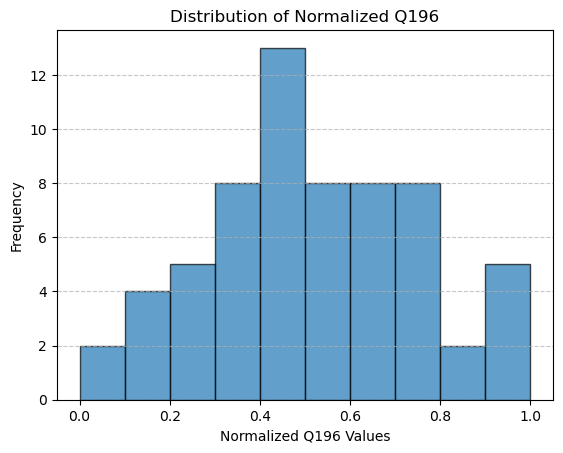

In [28]:
plt.hist(grouped['Normalized_Q196'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q196')
plt.xlabel('Normalized Q196 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:

#just pass the country list here to specify the countries you want to look at
# countries_included = ['AND','USA']
# grouped = grouped[grouped.B_COUNTRY_ALPHA.isin(countries_included)]
# print(grouped)

# plt.scatter(data = grouped,x ='B_COUNTRY_ALPHA', y = 'Normalized_Q196')
# plt.show()

**Please ignore the graph above**

**Q197**  
Do you think this country’s government should or should not have the right to do the following: Monitor all emails and any other information exchanged on the Internet  
1.- Definitely should have the right  
2.- Probably should have the right  
3.- Probably should not have the right   
4.- Definitely should not have the right   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  

In [30]:
# follow the same steps as that for Q196
country_Q197 = data[['B_COUNTRY_ALPHA','Q197']]
country_Q197.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94278 entries, 0 to 94277
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   B_COUNTRY_ALPHA  94278 non-null  object
 1   Q197             94278 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [31]:
country_Q197.describe()

,Q197
count,94278.000000
mean,2.698021
std,1.492178
min,-5.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [32]:
country_Q197 = country_Q197[country_Q197.Q197 > 0]
country_Q197.describe()

,Q197
count,90203.000000
mean,2.916921
std,1.060462
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [33]:
grouped197 = country_Q197.groupby('B_COUNTRY_ALPHA')['Q197'].mean().reset_index()

# Normalize 'Q196' within each country
grouped197['Normalized_Q197'] = (grouped197['Q197'] - grouped197['Q197'].min()) / (grouped197['Q197'].max() - grouped197['Q197'].min())

# Display the result
print(grouped197)

   B_COUNTRY_ALPHA      Q197  Normalized_Q197
0              AND  3.588645         1.000000
1              ARG  3.184567         0.794133
2              ARM  2.930676         0.664782
3              AUS  2.909649         0.654069
4              BGD  2.166994         0.275707
..             ...       ...              ...
58             URY  3.377184         0.892266
59             USA  3.169863         0.786642
60             VEN  3.400000         0.903890
61             VNM  3.320000         0.863132
62             ZWE  3.160967         0.782110

[63 rows x 3 columns]


In [34]:
grouped197.Normalized_Q197.describe()

count    63.000000
mean      0.664336
std       0.219032
min       0.000000
25%       0.577606
50%       0.700101
75%       0.820516
max       1.000000
Name: Normalized_Q197, dtype: float64

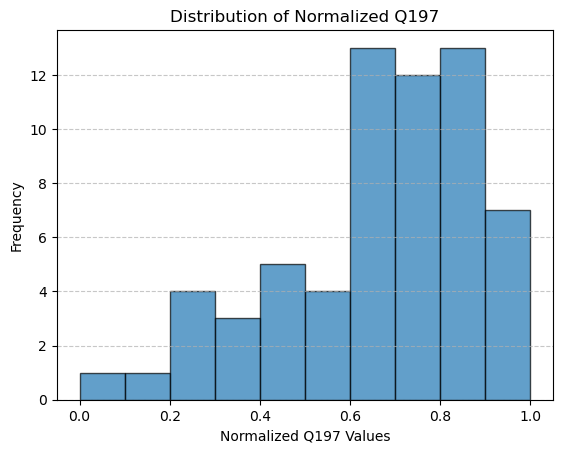

In [35]:
plt.hist(grouped197['Normalized_Q197'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q197')
plt.xlabel('Normalized Q197 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Q188**
Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card.  
Euthanasia  
1.- Never justifiable  
2.- 2  
3.- 3  
4.- 4  
5.- 5  
6.- 6  
7.- 7  
8.- 8  
9.- 9  
10.- Always justifiable   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked in survey -5-.- Missing; Not available  

In [36]:
country_Q188 = data[['B_COUNTRY_ALPHA','Q188']]
country_Q188.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94278 entries, 0 to 94277
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   B_COUNTRY_ALPHA  94278 non-null  object
 1   Q188             94278 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [37]:
country_Q188 = country_Q188[country_Q188.Q188 > 0]
print(country_Q188.describe())

               Q188
count  90497.000000
mean       3.915124
std        3.181090
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       10.000000


In [38]:
grouped188 = country_Q188.groupby('B_COUNTRY_ALPHA')['Q188'].mean().reset_index()

# Normalize 'Q188' within each country
grouped188['Normalized_Q188'] = (grouped188['Q188'] - grouped188['Q188'].min()) / (grouped188['Q188'].max() - grouped188['Q188'].min())

# Display the result
print(grouped188)

   B_COUNTRY_ALPHA      Q188  Normalized_Q188
0              AND  6.186304         0.783438
1              ARG  3.857635         0.416871
2              ARM  2.460493         0.196940
3              AUS  6.688776         0.862535
4              BGD  2.777500         0.246841
..             ...       ...              ...
59             URY  5.467942         0.670357
60             USA  5.384315         0.657193
61             VEN  3.332198         0.334159
62             VNM  4.883333         0.578331
63             ZWE  1.887510         0.106744

[64 rows x 3 columns]


In [39]:
grouped188.Normalized_Q188.describe()

count    64.000000
mean      0.404551
std       0.259052
min       0.000000
25%       0.194461
50%       0.377705
75%       0.554771
max       1.000000
Name: Normalized_Q188, dtype: float64

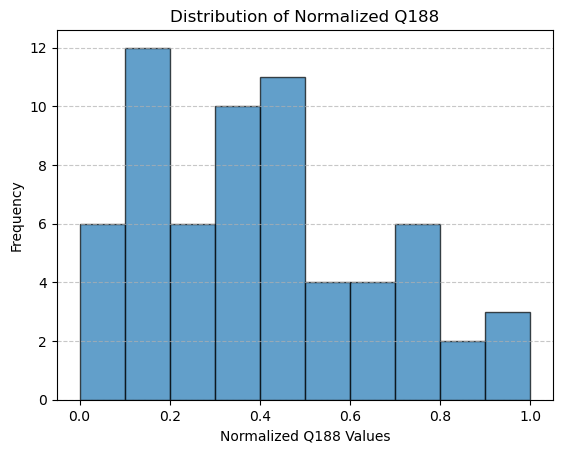

In [40]:
plt.hist(grouped188['Normalized_Q188'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q188')
plt.xlabel('Normalized Q188 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Q30 - University is more important for a boy than for a girl**  
For each of the following statements I read out, can you tell me how much you agree with each. Do you agree strongly, agree, disagree, or disagree strongly? - A university education is more important for a boy than for a girl  
1.- Agree strongly 2.- Agree  
3.- Disagree  
4.- Strongly disagree   
-1-.- Don ́t know  
2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  

In [41]:
country_Q30 = data[['B_COUNTRY_ALPHA','Q30']]
country_Q30 = country_Q30[country_Q30.Q30 > 0]
grouped30 = country_Q30.groupby('B_COUNTRY_ALPHA')['Q30'].mean().reset_index()

# Normalize 'Q30' within each country
grouped30['Normalized_Q30'] = (grouped30['Q30'] - grouped30['Q30'].min()) / (grouped30['Q30'].max() - grouped30['Q30'].min())
grouped30.Normalized_Q30.describe()

count    64.000000
mean      0.557748
std       0.235925
min       0.000000
25%       0.427241
50%       0.544920
75%       0.701035
max       1.000000
Name: Normalized_Q30, dtype: float64

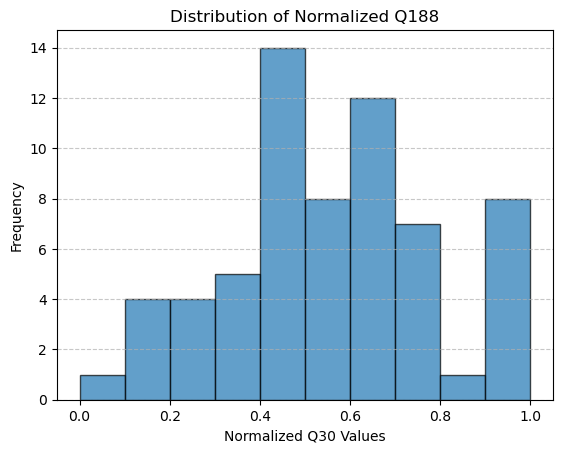

In [42]:
plt.hist(grouped30['Normalized_Q30'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q188')
plt.xlabel('Normalized Q30 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
merged_df = grouped30.merge(grouped188, on='B_COUNTRY_ALPHA',how='outer')

merged_df = merged_df.merge(grouped197, on='B_COUNTRY_ALPHA',how='outer')

merged_df

,B_COUNTRY_ALPHA,Q30,Normalized_Q30,Q188,Normalized_Q188,Q197,Normalized_Q197
0,AND,3.552448,0.936109,6.186304,0.783438,3.588645,1.000000
1,ARG,3.253564,0.724148,3.857635,0.416871,3.184567,0.794133
2,ARM,3.132293,0.638145,2.460493,0.196940,2.930676,0.664782
3,AUS,3.642539,1.000000,6.688776,0.862535,2.909649,0.654069
4,BGD,2.573529,0.241884,2.777500,0.246841,2.166994,0.275707
...,...,...,...,...,...,...,...
59,URY,3.228632,0.706467,5.467942,0.670357,3.377184,0.892266
60,USA,3.329466,0.777976,5.384315,0.657193,3.169863,0.786642
61,VEN,3.074790,0.597366,3.332198,0.334159,3.400000,0.903890
62,VNM,2.751667,0.368215,4.883333,0.578331,3.320000,0.863132


In [49]:
merged_df.drop(columns=['Q30','Q188','Q197'],inplace=True)
merged_df[merged_df.Normalized_Q197.isna()]

,B_COUNTRY_ALPHA,Normalized_Q30,Normalized_Q188,Normalized_Q197
15,EGY,0.541923,0.057237,NaN
